In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = "heart(1).csv"
df = pd.read_csv(data)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
x = df.drop(columns=['target'])
y = df['target']
print(x.shape)
print(y.shape)

(1025, 13)
(1025,)


In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(768, 13)
(257, 13)


In [7]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred =  clf.predict(x_train)
y_test_pred = clf.predict(x_test)

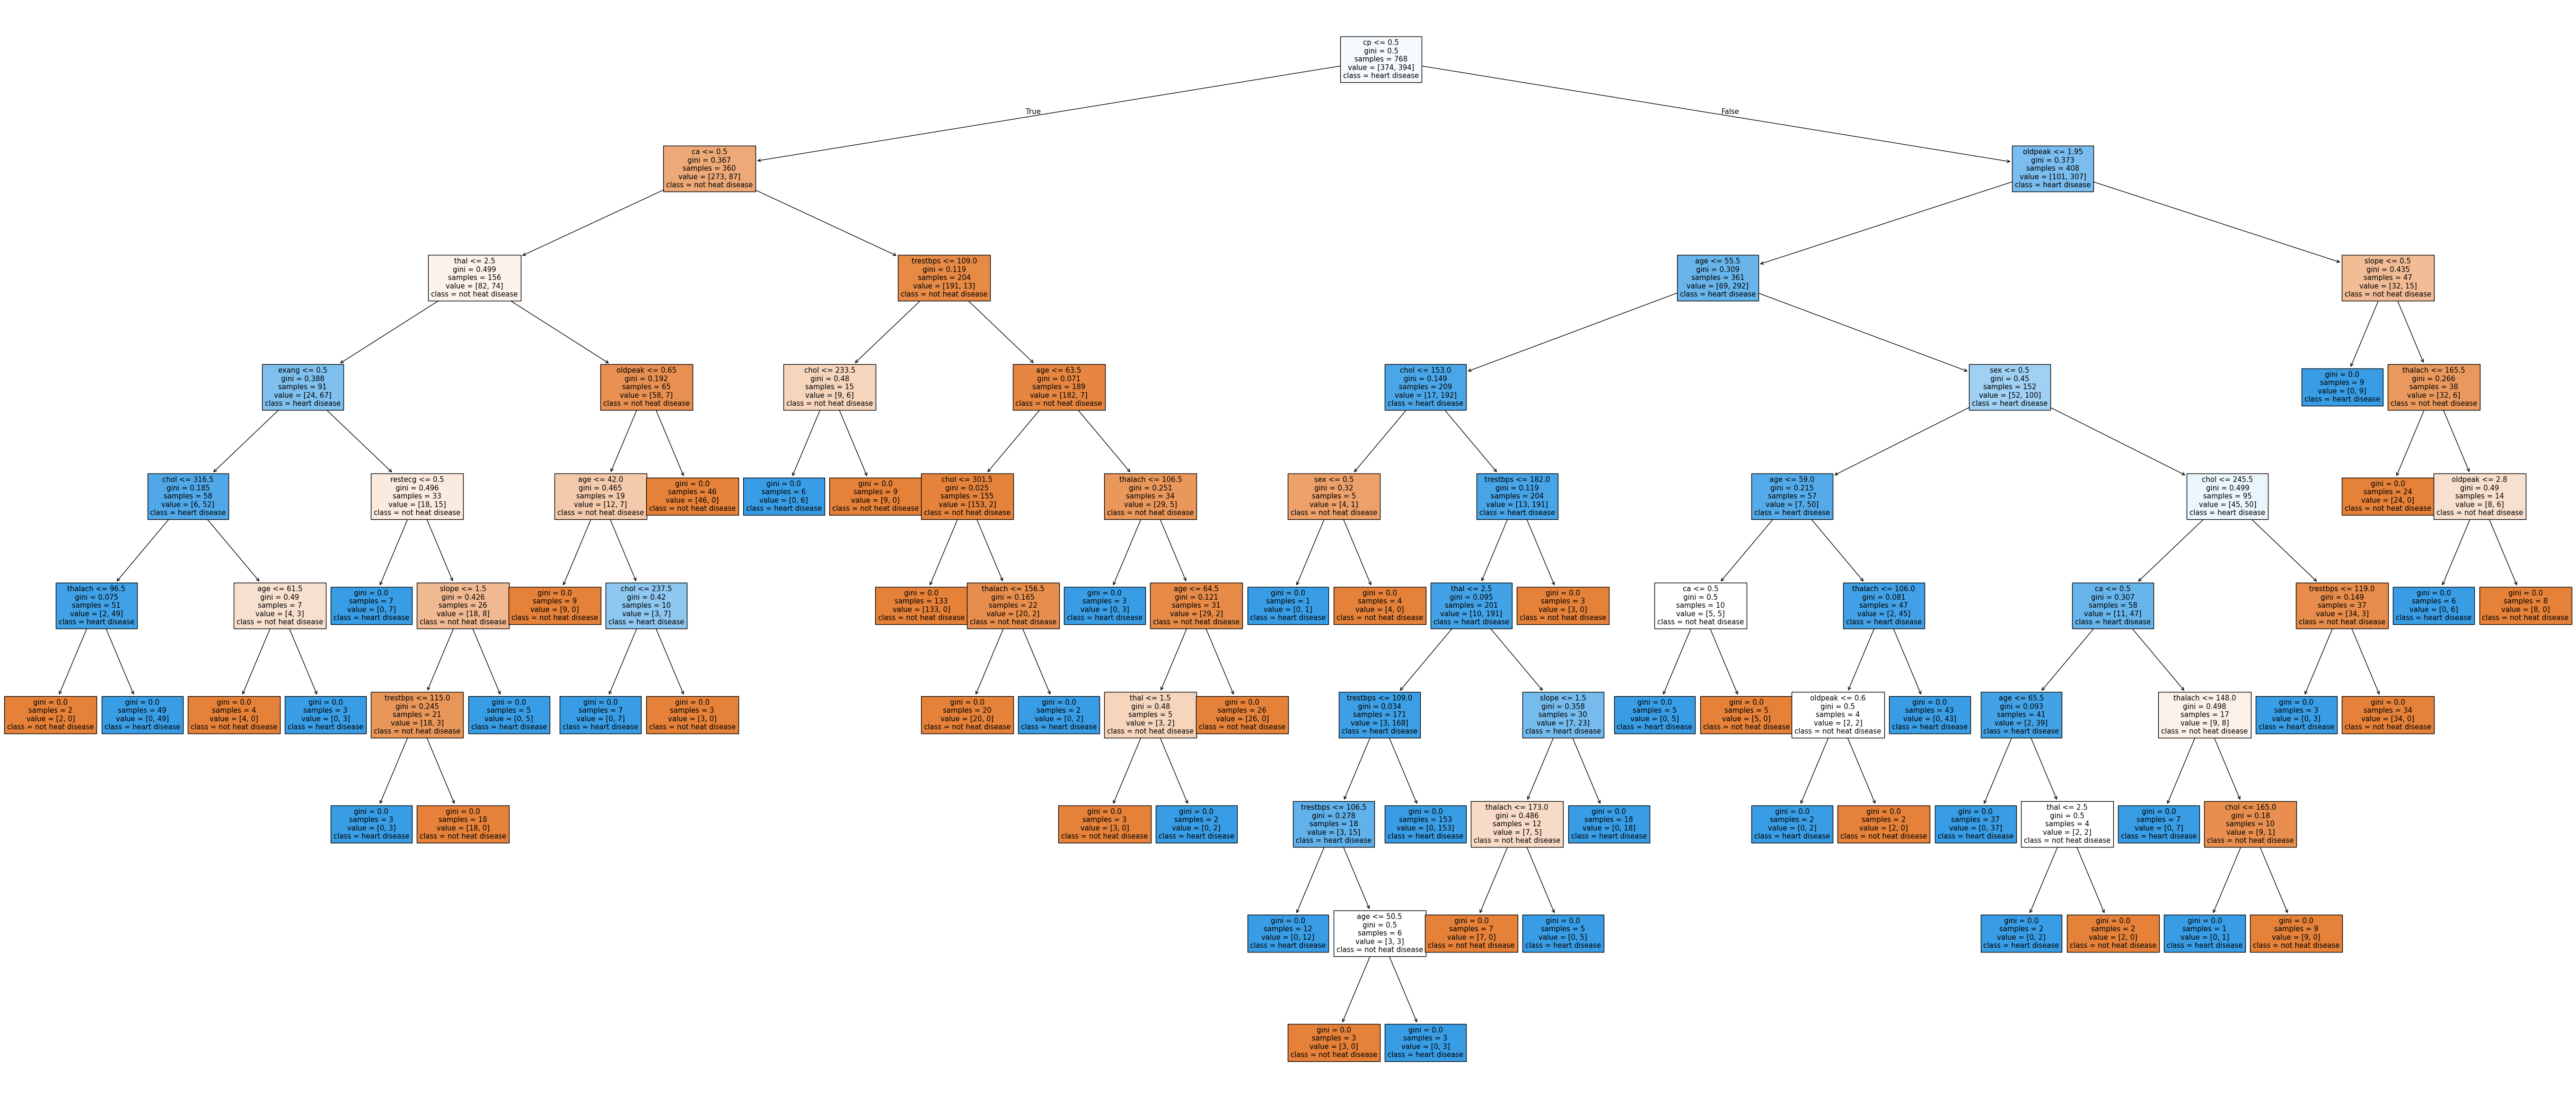

In [20]:
plt.figure(figsize=(70,30))
features = df.columns
classes = ['not heat disease','heart disease']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [21]:
def plot_confusionmatrix(y_train_pred , y_train_dom):
  print(f'{dom} confusion matrix')
  cf = confusion_matrix(y_train_pred,y_train_dom)
  sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='blue',fmt='g')
  plt.show()